In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


# Image transformations



<IPython.core.display.Javascript object>


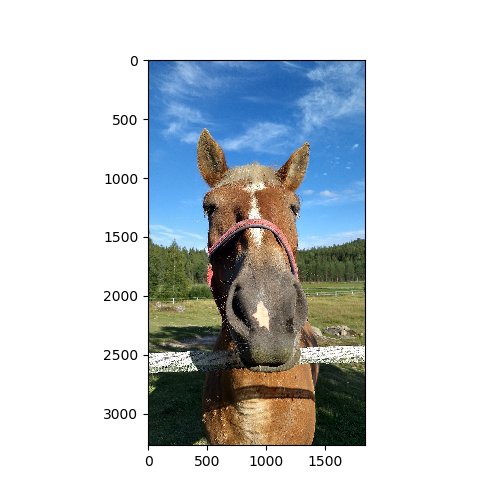

In [2]:
# let's read an image of a horse
horse = plt.imread('horse.ppm')

plt.figure(figsize=(5,5))
plt.imshow(horse)

We can zoom in to get a more detailed view. We take the rows 2000 to 2199 and columns 500 to 699, and all the colours (that's the ':' in the last position).

The individual pixels are now clearly visible.

<IPython.core.display.Javascript object>


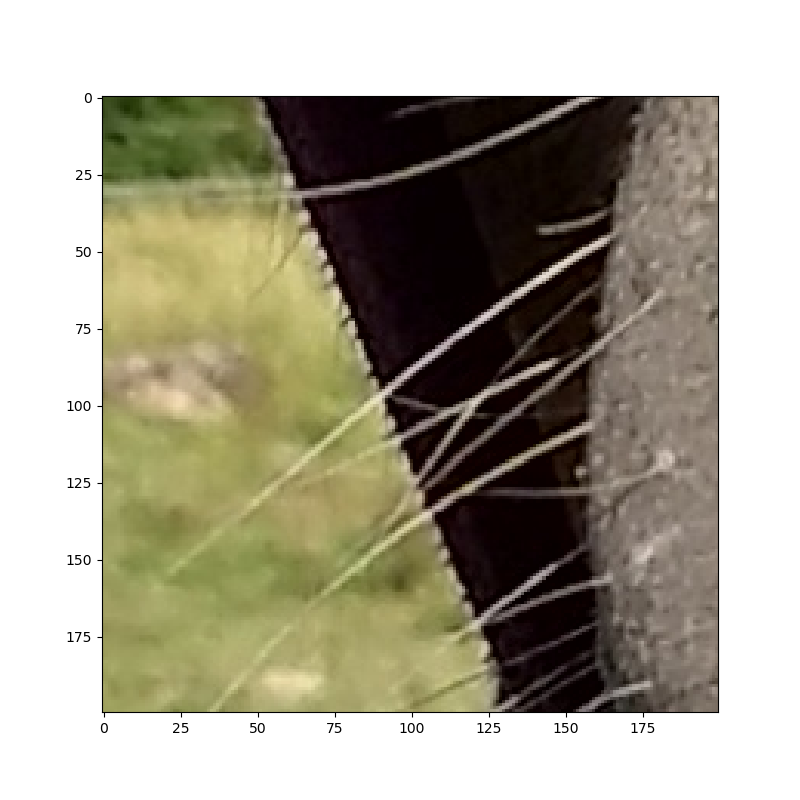

In [3]:
plt.figure(figsize(8,8))
plt.imshow(horse[2000:2200,500:700,:])

We can flip images in different directions using `np.flip`

Direction 0 is along the rows of the image, so the result is upside down. Direction 1 is along the columns, so we get a mirror image. Finally direction 2 is along the colour axis, so red is swapped with blue (green stays the same, because it is 'in the middle').

<IPython.core.display.Javascript object>


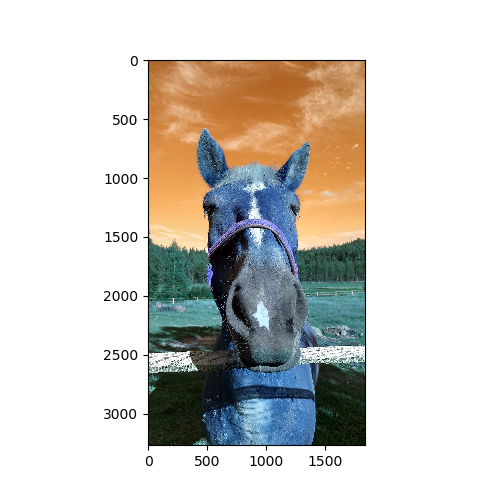

In [4]:
horseflip0 = np.flip(horse, 0)
horseflip1 = np.flip(horse, 1)
horseflip2 = np.flip(horse, 2)
plt.figure(figsize(5,5))
plt.imshow(horseflip2)

## Convex combinations

### Convex sets

A subset $X$ of $\mathbb{R}^n$ (for some $n$) is said to be _convex_, if for all $p,q \in X$, the line segment from $p$ to $q$ is also contained in $X$. If you think about this for a minute in 2 dimensions, it should be clear that this captures what we usually mean by 'convex' - something like 'no indentations'.

### Convex combinations

The line segment from $p$ to $q$ consists of the points $(1-t)p + tq$ where $0\leq t \leq 1$. As a 2-dimensional example, let $p = (0,2)$ and $q = (3,1)$. Then point halfway between $p$ and $q$ has coordinates
$$
0.5(0,2) + 0.5(3,1) = (1.5, 1.5).
$$
The point three quarters of the way from $p$ to $q$ has coordinates
$$
0.25(0,2) + 0.75(3,1) = (2.25, 1.25).
$$


If we have more points, say $p_1, p_2, p_3, \ldots, p_n$, then a _convex combination_ of $p_1, \ldots, p_n$ is a sum of the form
$$
\sum_{i=1}^n c_i p_i, \qquad, \text{where} c_i \geq 0 \text{ for } i=1,\ldots,n \text{ and } \sum_{i=1}^{n} c_i = 1.
$$

### The convex hull


We'll make some convex combination of the horse with the upside-down horse. First we use the weights $0.5$ and $0.5$ to create a straight average.

<IPython.core.display.Javascript object>


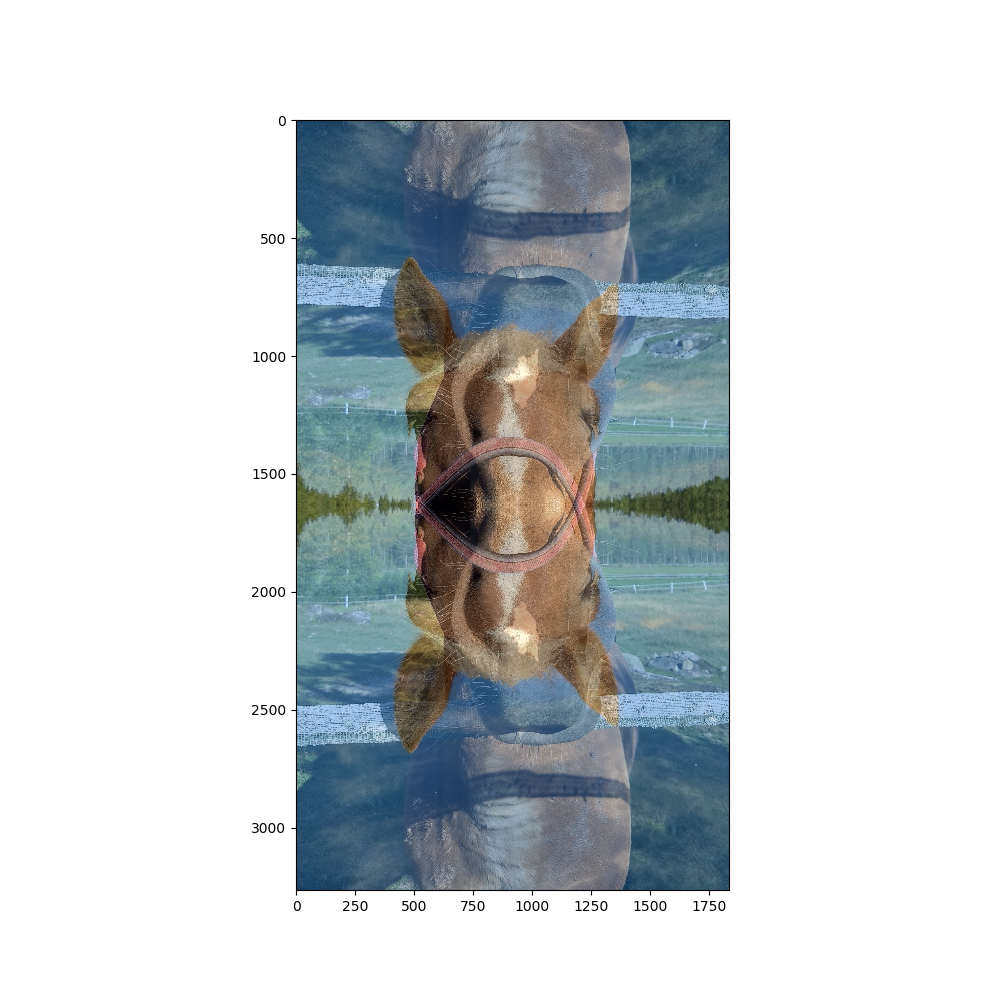

In [5]:
# Let's make some convex combinations of horse and upside-down horse

convhorse = np.empty(horse.shape, dtype = np.uint8)

# We have to be careful: when we multiply the entries of 'horse' by 0.5, they become 'float's and we have
# to cast them back to 'uint8's to get the correct entries.
convhorse = np.uint8(0.5*horse + 0.5*horseflip0)

plt.figure(figsize=(10,10))
plt.imshow(convhorse)


Next we can take for example $0.7$ and $0.3$.

<IPython.core.display.Javascript object>


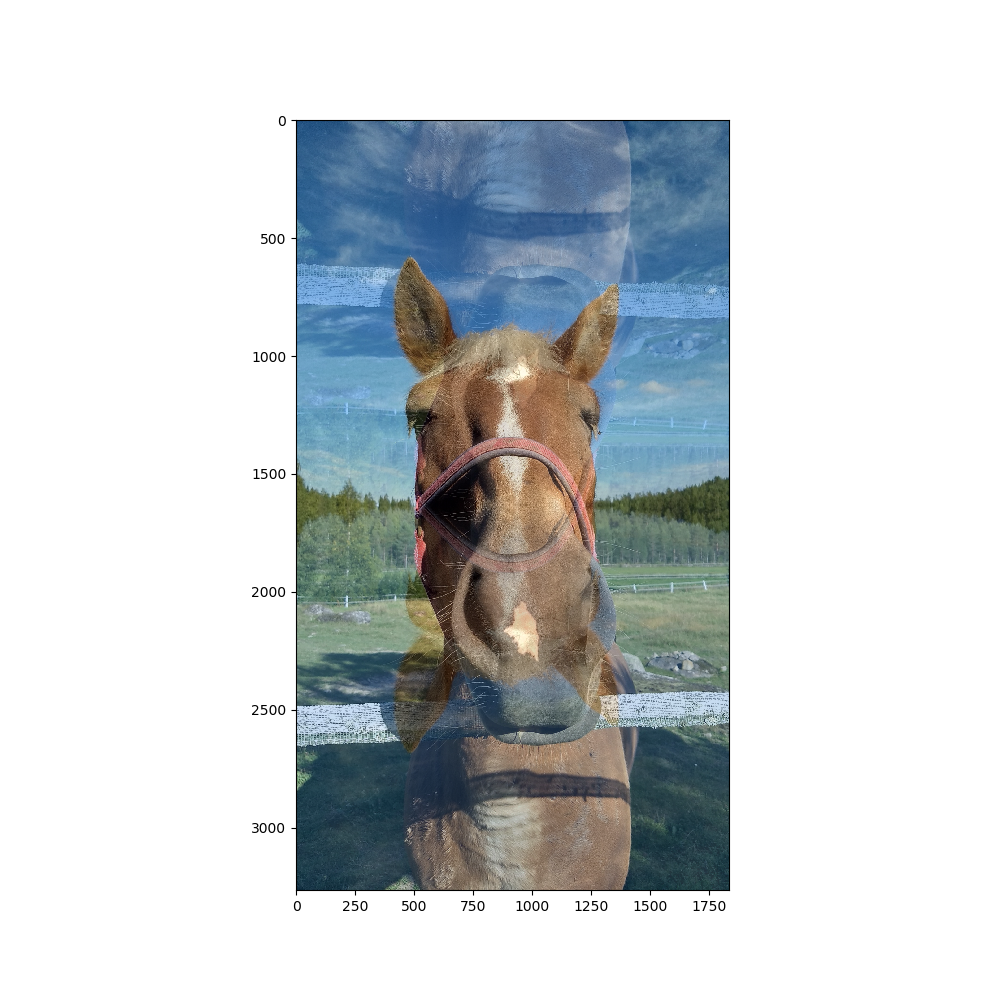

In [6]:
convhorse2 = np.empty(horse.shape, dtype = np.uint8)

# We have to be careful: when we multiply the entries of 'horse' by 0.5, they become 'float's and we have
# to cast them back to 'uint8's to get the correct entries.
convhorse2 = np.uint8(0.7*horse + 0.3*horseflip0)

plt.figure(figsize=(10,10))
plt.imshow(convhorse2)


Clearly the right-way-up horse is more dominant in this picture and we just get a faint shadow of the upside-down horse.